In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

In [3]:
d2l.use_svg_display()

### 3.5.1 读取数据集

In [4]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=trans, download=True)

In [5]:
len(mnist_train), len(mnist_test), type(mnist_train)

(60000, 10000, torchvision.datasets.mnist.FashionMNIST)

In [6]:
mnist_train[59999][0].shape, mnist_train[59999][1]

(torch.Size([1, 28, 28]), 5)

In [7]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
X.shape, y.shape, y

(torch.Size([18, 1, 28, 28]),
 torch.Size([18]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0]))

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

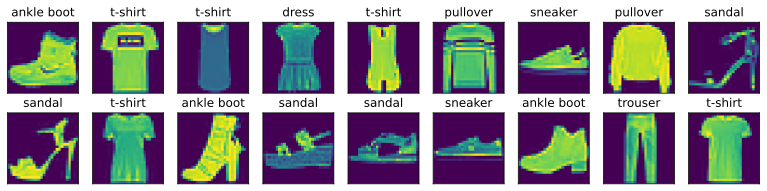

In [8]:
d2l.show_images(X.reshape(18, 28, 28), 2, 9, titles=d2l.get_fashion_mnist_labels(y))

In [9]:
X.reshape(18, 28, 28)[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

### 3.5.2 读取小批量

In [10]:
train_iter = data.DataLoader(mnist_train, batch_size=256, shuffle=True, num_workers=4)

# 看一下读取训练数据所需的时间
timer = d2l.Timer()
for X, y in train_iter:
    print(X.shape, y.shape)
    continue
f'{timer.stop():f} sec'

torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([2

'3.759270 sec'

### 3.5.3 整合所有组件

In [11]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


array([<Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'bag'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title

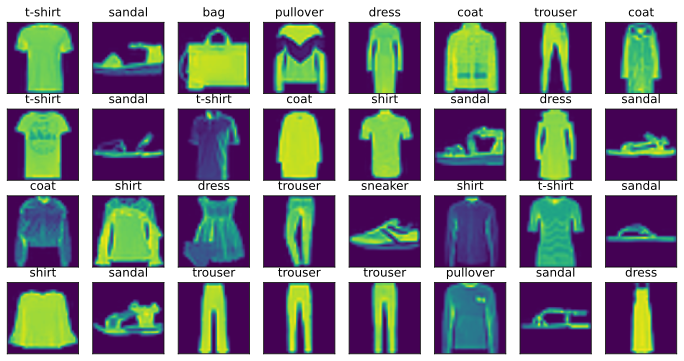

In [12]:
d2l.show_images(X.reshape(32, 64, 64), 4, 8, titles=d2l.get_fashion_mnist_labels(y))